In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df1=pd.read_csv('studentAssessment.csv')

In [3]:
df1.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [5]:
df1.shape
##(rows, columns)

(173912, 5)

In [6]:
#¿Hay valores nulos?
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [7]:
#El valor nulo es score 
#mostrar valores nulos
df1[np.isnan(df1['score']) == True ]

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN
...,...,...,...,...,...
148929,34903,582670,241,0,NaN
159251,37415,610738,87,0,NaN
166390,37427,631786,221,0,NaN
169725,37435,648110,62,0,NaN


In [8]:
#Change those null values by 0
nan_replacements = {"score": 0.0}
df1_final= df1.fillna(nan_replacements)

In [9]:
df1_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173912 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [10]:
df1_final[np.isnan(df1_final['score']) == True ]
#you can see as there are no longer null values in score

,id_assessment,id_student,date_submitted,is_banked,score


In [11]:
df1_final.groupby(['score']).count()['id_student']
#score-number of students with those scores

score
0.0        502
1.0        729
2.0         12
3.0         17
4.0         28
         ...  
96.0      2533
97.0      1505
98.0      1891
99.0       772
100.0    18813
Name: id_student, Length: 101, dtype: int64

In [12]:
#crear variable que se llame aproba
df1_final['Approved']=np.where((df1_final['score']>=5.0),1 ,0)
#0 sera suspenso y 1 sera aprobado

In [13]:
df1_final.groupby(['Approved']).count()['id_student']

Approved
0      1288
1    172624
Name: id_student, dtype: int64

In [14]:
df2=pd.read_csv('studentVle.csv')

In [15]:
df2.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [16]:
df2.shape

(10655280, 6)

In [21]:
df2.info()
#null values ->0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [22]:
df2.describe()
#No there are null values

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [40]:
#join the two dataframes from the base (the two columns that have equal ->id_student)
df3 = [df1_final, df2]
df_final=pd.concat(data)

In [41]:
df_final.shape

(10829192, 11)

In [42]:
df_final.describe()

,id_assessment,id_student,date_submitted,is_banked,score,Approved,id_site,date,sum_click
count,173912.000000,1.082919e+07,173912.000000,173912.000000,173912.000000,173912.000000,1.065528e+07,1.065528e+07,1.065528e+07
mean,26553.803556,7.328810e+05,116.032942,0.010977,75.724171,0.992594,7.383234e+05,9.517400e+01,3.716946e+00
std,8829.784254,5.822424e+05,71.484148,0.104194,18.940093,0.085739,1.312196e+05,7.607130e+01,8.849047e+00
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000,0.000000,5.267210e+05,-2.500000e+01,1.000000e+00
25%,15022.000000,5.075760e+05,51.000000,0.000000,65.000000,1.000000,6.735190e+05,2.500000e+01,1.000000e+00
50%,25359.000000,5.882070e+05,116.000000,0.000000,80.000000,1.000000,7.300690e+05,8.600000e+01,2.000000e+00
75%,34883.000000,6.463610e+05,173.000000,0.000000,90.000000,1.000000,8.770300e+05,1.560000e+02,3.000000e+00
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000,1.000000,1.049562e+06,2.690000e+02,6.977000e+03


In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829192 entries, 0 to 10655279
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id_assessment      float64
 1   id_student         int64  
 2   date_submitted     float64
 3   is_banked          float64
 4   score              float64
 5   Approved           float64
 6   code_module        object 
 7   code_presentation  object 
 8   id_site            float64
 9   date               float64
 10  sum_click          float64
dtypes: float64(8), int64(1), object(2)
memory usage: 991.4+ MB


In [44]:
df_final.groupby(['Approved', 'sum_click' ]).count()['id_student']


Series([], Name: id_student, dtype: int64)

In [87]:

df3 = {"score:": -1.0,"Approved": -1.0}

df_final = df_final.fillna(nan_replacements)
#if these values have -1, it means that there are no values studied about those students.



In [65]:
df_final.describe()

,id_assessment,id_student,date_submitted,is_banked,score,Approved,id_site,date,sum_click
count,173912.000000,1.082919e+07,173912.000000,173912.000000,1.082919e+07,173912.000000,1.065528e+07,1.065528e+07,1.065528e+07
mean,26553.803556,7.328810e+05,116.032942,0.010977,1.216096e+00,0.992594,7.383234e+05,9.517400e+01,3.716946e+00
std,8829.784254,5.822424e+05,71.484148,0.104194,9.816821e+00,0.085739,1.312196e+05,7.607130e+01,8.849047e+00
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000e+00,0.000000,5.267210e+05,-2.500000e+01,1.000000e+00
25%,15022.000000,5.075760e+05,51.000000,0.000000,0.000000e+00,1.000000,6.735190e+05,2.500000e+01,1.000000e+00
50%,25359.000000,5.882070e+05,116.000000,0.000000,0.000000e+00,1.000000,7.300690e+05,8.600000e+01,2.000000e+00
75%,34883.000000,6.463610e+05,173.000000,0.000000,0.000000e+00,1.000000,8.770300e+05,1.560000e+02,3.000000e+00
max,37443.000000,2.698588e+06,608.000000,1.000000,1.000000e+02,1.000000,1.049562e+06,2.690000e+02,6.977000e+03


In [66]:
df_final.groupby(['score', 'sum_click' ]).count()['id_student']

score  sum_click
0.0    1.0          5113910
       2.0          1929023
       3.0           965277
       4.0           612858
       5.0           415139
                     ...   
       3958.0             1
       4098.0             1
       4523.0             1
       4953.0             1
       6977.0             1
Name: id_student, Length: 498, dtype: int64

In [69]:
df_final["Approved"].value_counts()

1.0    172624
0.0      1288
Name: Approved, dtype: int64

In [70]:
df_final.groupby("Approved")["id_student"].describe()
#study behavior of the variable approved that is the one that interests us

,count,mean,std,min,25%,50%,75%,max
Approved,,,,,,,,
0.0,1288.0,667573.770186,462727.821160,26315.0,532341.25,611619.5,675776.5,2687858.0
1.0,172624.0,705431.090219,553001.112456,6516.0,504251.00,585134.0,634383.0,2698588.0


In [73]:
df_final.groupby("id_assessment")["Approved"].describe()
#Statistics of home one of the subjects according to its number of passes/failures

,count,mean,std,min,25%,50%,75%,max
id_assessment,,,,,,,,
1752.0,359.0,0.997214,0.052778,0.0,1.0,1.0,1.0,1.0
1753.0,342.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1754.0,331.0,0.993958,0.077614,0.0,1.0,1.0,1.0,1.0
1755.0,303.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1756.0,298.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
37439.0,504.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
37440.0,479.0,0.997912,0.045691,0.0,1.0,1.0,1.0,1.0
37441.0,473.0,0.997886,0.045980,0.0,1.0,1.0,1.0,1.0


In [83]:

df_final.groupby(['Approved', 'sum_click' ]).count()['id_student']


Series([], Name: id_student, dtype: int64)

score  sum_click
0.0    1.0          5113910
       2.0          1929023
       3.0           965277
       4.0           612858
       5.0           415139
                     ...   
       3958.0             1
       4098.0             1
       4523.0             1
       4953.0             1
       6977.0             1
Name: id_student, Length: 498, dtype: int64


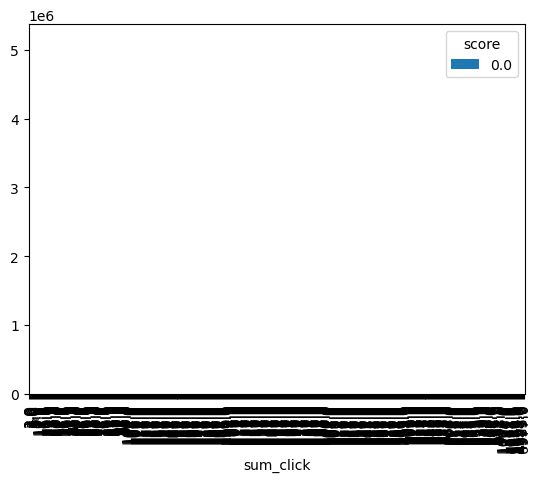

In [89]:
#relacionar mediante una grafica las dos variables a estudiar: score y sum_click mediante el id_student
grouped_student = df_final.groupby(['score', 'sum_click']).count()['id_student']
print(grouped_student)
(grouped_student.unstack(level=0).plot.bar())
plt.show()
